<a href="https://colab.research.google.com/github/sg758253/sg1205/blob/main/ADVDS/project2/Epicurious.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Epicurious dataset (Links to an external site.) contains over 20,000 recipes listed by recipe rating, nutritional information (calories, protein, fat, sodium), and assigned binary categories (22-minute meal, 3-ingredient recipe, etc.) that are very sparse

In [59]:
#import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sbn
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [60]:
# reading the csv file
df = pd.read_csv('https://raw.githubusercontent.com/sg758253/sg1205/main/ADVDS/project2/archive/epi_r.csv')

In [61]:
# display the data
df

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair wit

In [62]:
# shape of data
df.shape

(20052, 680)

In [63]:
# describing the data
df.describe()


,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.00000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,0.005436,0.000150,0.000100,0.041642,0.029124,0.001945,0.002244,0.005785,0.005536,0.000100,0.000598,0.068422,0.033214,0.000299,0.013415,0.000399,0.007630,0.013864,0.000997,0.010323,0.000050,0.000349,0.000349,0.013615,0.010074,0.046778,0.029274,0.220078,0.008827,0.002494,...,0.09231,0.104079,0.341412,0.000449,0.000249,0.000549,0.032815,0.000549,0.006234,0.000050,0.021195,0.001147,0.001297,0.000499,0.006882,0.003591,0.005585,0.001646,0.000050,0.000050,0.244664,0.002843,0.024287,0.001496,0.000898,0.000050,0.009525,0.154548,0.000199,0.005087,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,0.073530,0.012231,0.009987,0.199774,0.168159,0.044060,0.047321,0.075840,0.074197,0.009987,0.024456,0.252475,0.179198,0.017296,0.115047,0.019971,0.087019,0.116929,0.031567,0.101080,0.007062,0.018681,0.018681,0.115888,0.099864,0.211169,0.168577,0.414309,0.093539,0.049874,...,0.28947,0.305371,0.474195,0.021181,0.015789,0.023416,0.178156,0.023416,0.078710,0.007062,0.144037,0.033849,0.035986,0.022327,0.082675,0.059816,0.074529,0.040535,0.007062,0.007062,0.429898,0.053242,0.153942,0.038652,0.029948,0.007062,0.097134,0.361482,0.014123,0.071142,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [64]:
# check null data
df.isnull().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64

There are null data present in dataset which needs to be removed.

In [65]:
#info of the data
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 680 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    title                     20052 non-null  object 
 1    rating                    20052 non-null  float64
 2    calories                  15935 non-null  float64
 3    protein                   15890 non-null  float64
 4    fat                       15869 non-null  float64
 5    sodium                    15933 non-null  float64
 6    #cakeweek                 20052 non-null  float64
 7    #wasteless                20052 non-null  float64
 8    22-minute meals           20052 non-null  float64
 9    3-ingredient recipes      20052 non-null  float64
 10   30 days of groceries      20052 non-null  float64
 11   advance prep required     20052 non-null  float64
 12   alabama                   20052 non-null  float64
 13   alaska                    20052 non-null  fl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


# Data preprocessing

1) Perform data preparation: handle missing values and duplicate recipes, deal with skewed distributions on continuous attributes, i.e., calories, protein, fat, sodium, etc.

In [66]:
# Remove rows contains no value
df.dropna(axis=0, inplace=True)
df.drop_duplicates('title', keep='first', inplace=True)
df.shape

(14058, 680)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa469953250>,
      dtype=object)

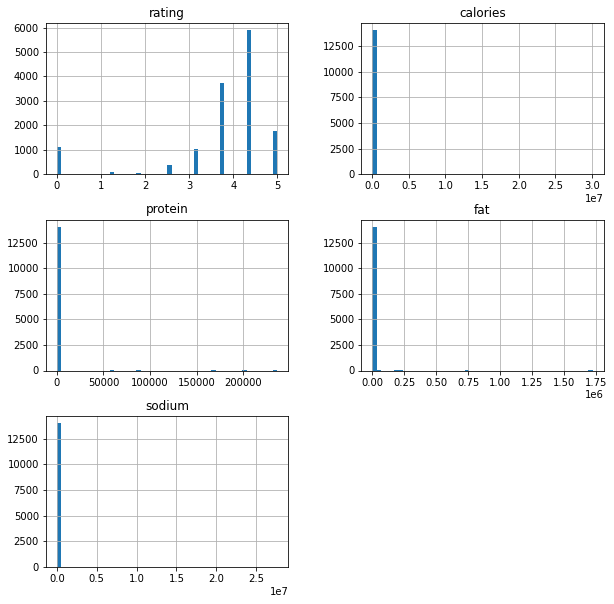

In [67]:
# ploting the graph to understand data
df_ca=df[['rating','calories','protein','fat','sodium']]
df_ca.hist(bins=50, figsize=(10,10))

In [68]:
# doing lograthmic scaling as continous functions are right skewed
scaler = FunctionTransformer(np.log1p, validate=True)
scaler.fit(df_ca)
scaled_arr = scaler.transform(df_ca)
scaled_arr

array([[1.25276297, 6.05678401, 3.4339872 , 2.07944154, 6.32793678],
       [1.68175857, 6.00141488, 2.94443898, 3.17805383, 7.27239839],
       [1.55814462, 5.11198779, 1.94591015, 2.07944154, 5.11198779],
       ...,
       [1.68175857, 6.33505425, 3.4657359 , 3.66356165, 6.48157713],
       [1.68175857, 6.44888939, 3.8286414 , 3.21887582, 6.24997524],
       [1.68175857, 6.32972091, 4.30406509, 2.39789527, 8.21581779]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa469953210>,
      dtype=object)

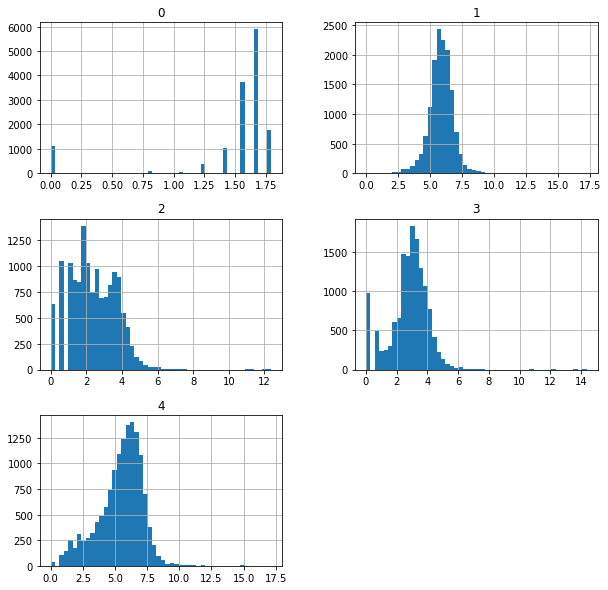

In [69]:
#plotting graphs to understand distribution of continous data after scaling
pd.DataFrame(scaled_arr).hist(bins=50, figsize=(10,10))

2) Compute the pair-wise Pearson correlation coefficients r to see which numeric attributes have strong associations with rating.

In [70]:
corr_matrix=df_ca.corr()
corr_matrix["rating"].sort_values(ascending=False)
df_ca.corr()

,rating,calories,protein,fat,sodium
rating,1.000000,0.007622,0.012398,0.006992,0.008052
calories,0.007622,1.000000,0.803335,0.996527,0.996518
protein,0.012398,0.803335,1.000000,0.770938,0.819282
fat,0.006992,0.996527,0.770938,1.000000,0.986456
sodium,0.008052,0.996518,0.819282,0.986456,1.000000


This table is showing that there is lack of strong correlation of rating to any of the continuous values ( as all are away from 1)

3) Perform PCA on the scrubbed data to find out which attributes contribute the most to the variance. Graph the elbow plot.

In [71]:

# pca1 selecting only 2 components
pca1 = PCA(n_components=2)
pca1.fit(scaled_arr)
# transform the data to its first 2 principal components
x_pca1 = pca1.transform(scaled_arr)

# pca2 selecting all components with 95% of variance
pca2 = PCA()
pca2.fit(scaled_arr)
cumsum = np.cumsum(pca2.explained_variance_ratio_)
d2 = np.argmax(cumsum >= 0.95) + 1

# transform the data to its top 95% variance principal components
x_pca2 = pca2.transform(scaled_arr)

print ('Shape of Scaled data: ', scaled_arr.shape)
print ('Shape of Transformed data: ', x_pca1.shape)
print ('Explained variance by 2 components: ', pca1.explained_variance_ratio_)
print ('Components explaining 95% of variance: ', d2)


Shape of Scaled data:  (14058, 5)
Shape of Transformed data:  (14058, 2)
Explained variance by 2 components:  [0.74809546 0.14522258]
Components explaining 95% of variance:  4


This shows that when we take 2 components 74% variance lies in PC1 ,14% in PC2 and rest 12% in PC3. and for that we require 4D model to preserve 95% variance

In [72]:
# showing relationship between components and features
print(pd.DataFrame(pca1.components_,columns=df_ca.columns,index = ['PCA1','PCA2']))

        rating  calories   protein       fat    sodium
PCA1  0.044286  0.322504  0.489907  0.453121  0.669853
PCA2 -0.016767 -0.436255 -0.220255 -0.503123  0.712569


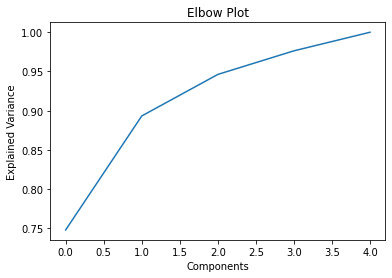

In [73]:
# The elbow plot
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Plot')
plt.show()

4) Create a LogisticRegression model to determine how well the model predicts whether a recipe was part of #cakeweek or any other category that you think it should be included in the study (e.g. 22-minute meal, 3-ingredient recipe, etc.)

In [74]:
# droping non numeric column
df1=df.drop(columns=["title"],axis=1)

# removing not ingredients binary columns
df1=df1.drop(columns=["22-minute meals"],axis=1)
df1=df1.drop(columns=["3-ingredient recipes"],axis=1)
df1=df1.drop(columns=["#cakeweek"],axis=1)

# removing columns not appearing often (true less than 10 times)
c=0;
for col in df1.iloc[:,6:].columns:
   if len(df1[df1[col]==1])<10:
     df1=df1.drop(columns=col)
     c=c+1

# removing data where ratings =0
df1=df1[df1['rating'] > 0]
df1=df1[df1['calories'] > 0]
df1=df1[df1['calories'] < 10000]



In [77]:
df1.shape

(12943, 487)

In [78]:
df1.describe()

,rating,calories,protein,fat,sodium,#wasteless,advance prep required,alcoholic,almond,amaretto,anchovy,anise,anniversary,appetizer,apple,apricot,artichoke,arugula,asian pear,asparagus,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef tenderloin,beer,beet,bell pepper,berry,birthday,bitters,...,tomatillo,tomato,tortillas,tree nut,tree nut free,triple sec,tropical fruit,trout,tuna,turnip,valentine's day,vanilla,veal,vegan,vegetable,vegetarian,vinegar,virginia,vodka,walnut,wasabi,washington,watercress,watermelon,wedding,weelicious,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,wine,winter,wok,yellow squash,yogurt,zucchini,snack,snack week,turkey
count,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,...,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000
mean,4.089083,517.754539,23.316155,29.798501,741.673105,0.000077,0.004327,0.022947,0.031137,0.002241,0.001391,0.005408,0.006258,0.073785,0.035231,0.014293,0.008576,0.013598,0.001004,0.010971,0.013753,0.010430,0.043576,0.035077,0.255505,0.008731,0.002781,0.030441,0.004172,0.001468,0.029205,0.046434,0.003322,0.004172,0.005099,0.010353,0.039713,0.021556,0.009735,0.001777,...,0.003709,0.114811,0.007185,0.004404,0.367226,0.003554,0.002859,0.002859,0.006799,0.004867,0.011821,0.013057,0.007417,0.082670,0.113189,0.353009,0.032450,0.000773,0.005486,0.023642,0.001313,0.001777,0.007649,0.003400,0.005331,0.001159,0.248397,0.002086,0.028741,0.001700,0.000850,0.009117,0.170671,0.006026,0.001468,0.023333,0.016302,0.000695,0.000695,0.019161
std,0.649867,610.811255,44.555283,43.676717,3063.250860,0.008790,0.065637,0.149740,0.173693,0.047284,0.037268,0.073345,0.078864,0.261431,0.184371,0.118702,0.092213,0.115820,0.031678,0.104171,0.116467,0.101599,0.204157,0.183981,0.436161,0.093032,0.052668,0.171804,0.064460,0.038288,0.168387,0.210432,0.057545,0.064460,0.071230,0.101226,0.195291,0.145234,0.098188,0.042119,...,0.060787,0.318806,0.084465,0.066218,0.482067,0.059512,0.053392,0.053392,0.082179,0.069600,0.108084,0.113524,0.085806,0.275394,0.316835,0.477924,0.177199,0.027786,0.073864,0.151937,0.036219,0.042119,0.087126,0.058208,0.072822,0.034025,0.432100,0.045628,0.167085,0.041195,0.029141,0.095050,0.376236,0.077399,0.038288,0.150965,0.126640,0.026361,0.026361,0.137096
min,1.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,219.000000,4.00000

In [79]:
#reshape an array by adding an extra dimension
x = np.c_[df1]
y = np.c_[df1['alcoholic']]

In [80]:
# Split the data set in the form of 80-20
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

lr = LogisticRegression(solver='lbfgs', max_iter=100000)
lr.fit(X_train, Y_train)

# measure model accuracy
Y_pred = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:

# labels are: advance preparation needed (1) vs. no advance preparation needed (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('Total cases', x.shape)
print ('Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)

Total cases (12943, 487)
Training and testing cases (9060, 487) (3883, 487)
Confusion matrix:


,0,1
0,3779,0
1,1,103


5) Use your own judgment on how to define a new feature healthy. Determine if healthy and rating are correlated, and if your model can predict more accurately with the new feature added to the dataset.

In [82]:
df1["healthy"]=(df1["calories"]+df1['protein'])-(df1['fat'])
df_continous_added_attribute=df1[['rating','calories','protein','fat','sodium','healthy']]
corr_matrix=df_continous_added_attribute.corr()
corr_matrix["rating"].sort_values(ascending=False)
df_continous_added_attribute.corr()

,rating,calories,protein,fat,sodium,healthy
rating,1.000000,0.049958,0.043009,0.046196,0.027583,0.050379
calories,0.049958,1.000000,0.701937,0.911604,0.231654,0.997642
protein,0.043009,0.701937,1.000000,0.540318,0.359762,0.744926
fat,0.046196,0.911604,0.540318,1.000000,0.143711,0.889879
sodium,0.027583,0.231654,0.359762,0.143711,1.000000,0.250540
healthy,0.050379,0.997642,0.744926,0.889879,0.250540,1.000000


In [83]:
#using new feature for prediction model
x = np.c_[df1]
y = np.c_[df1['alcoholic']]
# Split the dataset into (70%-30%)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

lr = LogisticRegression(solver='lbfgs', max_iter=100000)
lr.fit(X_train, Y_train)

# measure model accuracy
Y_pred = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
# labels are: advance preparation needed (1) vs. no advance preparation needed (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', x.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)

#Total cases (12943, 487)
#Training and testing cases (9060, 487) (3883, 487)
Confusion matrix:


,0,1
0,3779,0
1,1,103


The above matrix represents that the new column healthy has no influence on the model forecast.